<h1> Loading the Data </h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

class DataProcessor:
    def __init__(self, input_path, file_names):
        self.input_path = input_path
        self.file_names = file_names
        
    def read_files(self):
        self.data = {}
        print("Reading files...")
        for file in self.file_names:
            with open(self.input_path + file + '.txt', 'r') as f:
                self.data[file] = pd.read_csv(f, header=None, sep='\t')
        return self.data
    
    def print_shape(self):
        print("Files read:")
        for file in self.data:
            print(f"{file}: {self.data[file].shape}")
            
    def create_target_df(self):
        target_columns = ['Cooler_Condition', 'Valve_Condition', 
                        'Internal_Pump_Leakage', 'Hydraulic_Accumulator', 
                        'Stable_Flag']
        self.data['target'].columns = target_columns
        self.valve_condition = self.data['target']['Valve_Condition']
        #del self.data['target']
        return self.valve_condition

def process_data():
    input_path = "input_data/"
    file_names = [
        "ce", "cp", "eps1", "se", "vs1", 
        "fs1", "fs2", 
        "ps1", "ps2", "ps3", "ps4", "ps5", "ps6",
        "ts1", "ts2", "ts3", "ts4", "target"
    ]
    
    processor = DataProcessor(input_path, file_names)
    data = processor.read_files()
    processor.print_shape()
    df_target = processor.create_target_df()
    df_target = processor.valve_condition
    return data, df_target

data, df_target = process_data()

Reading files...
Files read:
ce: (2205, 60)
cp: (2205, 60)
eps1: (2205, 6000)
se: (2205, 60)
vs1: (2205, 60)
fs1: (2205, 600)
fs2: (2205, 600)
ps1: (2205, 6000)
ps2: (2205, 6000)
ps3: (2205, 6000)
ps4: (2205, 6000)
ps5: (2205, 6000)
ps6: (2205, 6000)
ts1: (2205, 60)
ts2: (2205, 60)
ts3: (2205, 60)
ts4: (2205, 60)
target: (2205, 5)


<h1> 1. Data Exploration </h1>

In [3]:
def mean_per_vc(dataframe, target = df_target):
    df_combined = pd.concat([dataframe, target], axis=1)
    mean_per_condition = (
        df_combined.drop(columns=['Valve_Condition'], axis=1) 
          .groupby(df_combined['Valve_Condition'])           
          .mean()                                 
          .mean(axis=1)
        )                             
    return mean_per_condition

In [4]:
def data_plot(ax, dataframe, title, x_label, y_label):
    for i in range(dataframe.shape[0] - 1):
        ax.plot(dataframe.iloc[i], color='blue', linewidth=0.5)

    ax.plot(dataframe.mean(axis=0), color='red', linewidth=1, label='Mean')
    ax.set_title(title, fontsize=10)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.legend(loc='best', fontsize='small')
    

In [11]:
def plot_single_rows(ax, dataframe, title, x_label, y_label, idx):
    for index in idx:
        ax.plot(dataframe.iloc[index], label=f"Idx: {index}", linewidth=1)
    ax.set_title(title, fontsize=10)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.legend(loc='best', fontsize='small')

In [ ]:
idx = [0 , 500, 1000, 1500, 2000, 2204]

In [ ]:
temp_sensors = ['ts1', 'ts2', 'ts3', 'ts4']
vf_sensors = ['fs1', 'fs2']
ps_sensors = ['ps1', 'ps2', 'ps3', 'ps4', 'ps5', 'ps6']

<h2>CE sensor (1 Hz) </h2>

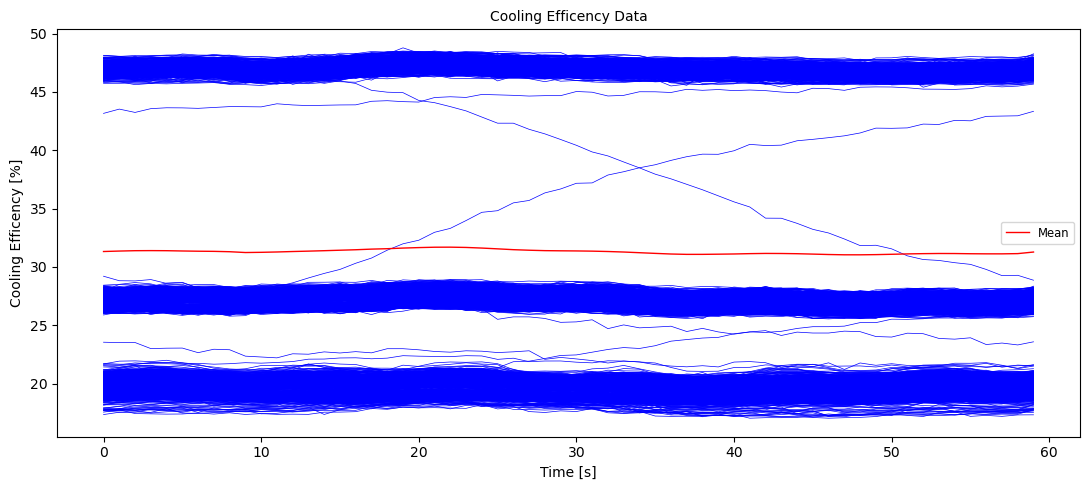

In [63]:
title = "Cooling Efficency Data"
x_label = "Time [s]"
y_label = "Cooling Efficency [%]"

fig, ax = plt.subplots(figsize=(11, 5), dpi=100)

data_plot(ax, data['ce'], title, x_label, y_label)

plt.tight_layout()
plt.show()


<h3>CE Sensor - Single Rows </h3>

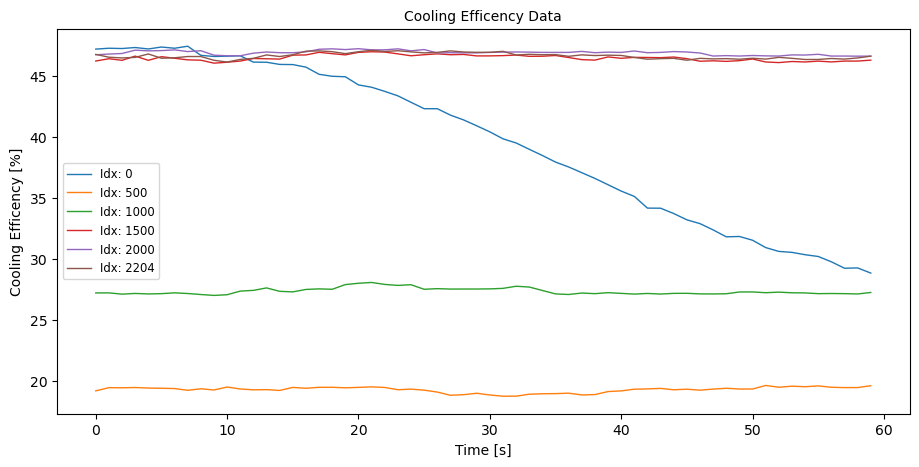

In [73]:
title = "Cooling Efficency Data - Single Rows"
x_label = "Time [s]"
y_label = "Cooling Efficency [%]"

fig, ax = plt.subplots(figsize=(11, 5), dpi=100)
plot_single_rows(ax, data['ce'], title, x_label, y_label, idx)

In [4]:
print(mean_per_vc(data['ce']))

Valve_Condition
73     31.319484
80     31.297182
90     31.358514
100    31.274134
dtype: float64


<h2>CP Sensor (1 Hz)</h2>

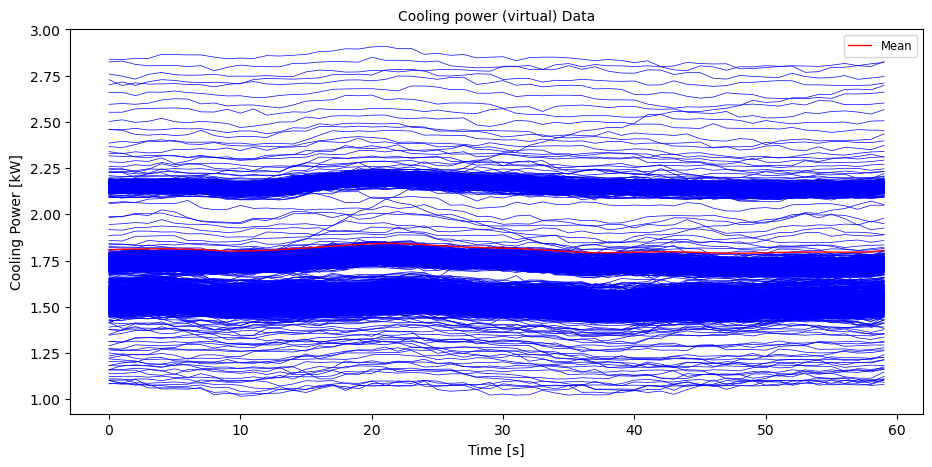

In [74]:
title = "Cooling power (virtual) Data"
x_label = "Time [s]"
y_label = "Cooling Power [kW]"

fig, ax = plt.subplots(figsize=(11, 5), dpi=100)

data_plot(ax, data['cp'], title, x_label, y_label)

<h3> CP Sensor - Single Rows </h3>

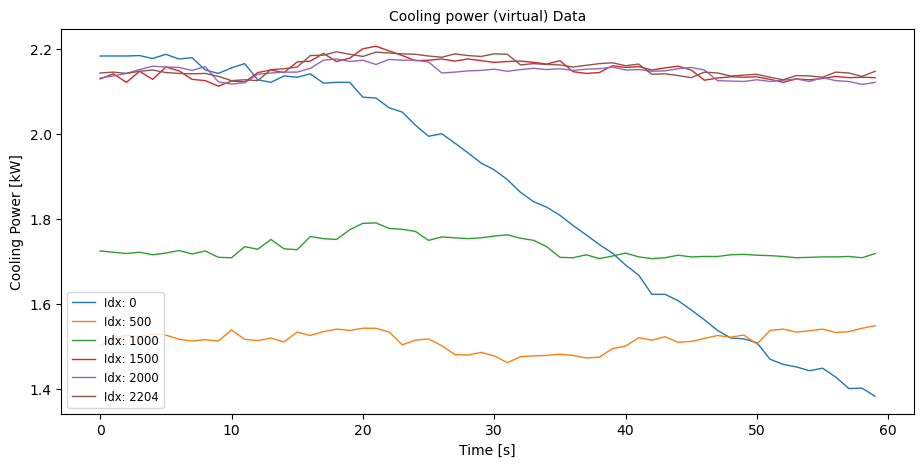

In [75]:
title = "Cooling power (virtual) Data - Single Rows"
x_label = "Time [s]"
y_label = "Cooling Power [kW]"

fig, ax = plt.subplots(figsize=(11, 5), dpi=100)
plot_single_rows(ax, data['cp'], title, x_label, y_label, idx)

In [39]:
print(mean_per_vc(data['cp']))

Valve_Condition
73     1.805034
80     1.805221
90     1.808178
100    1.810562
dtype: float64


<h2>VS Sensor (1 Hz)</h2>

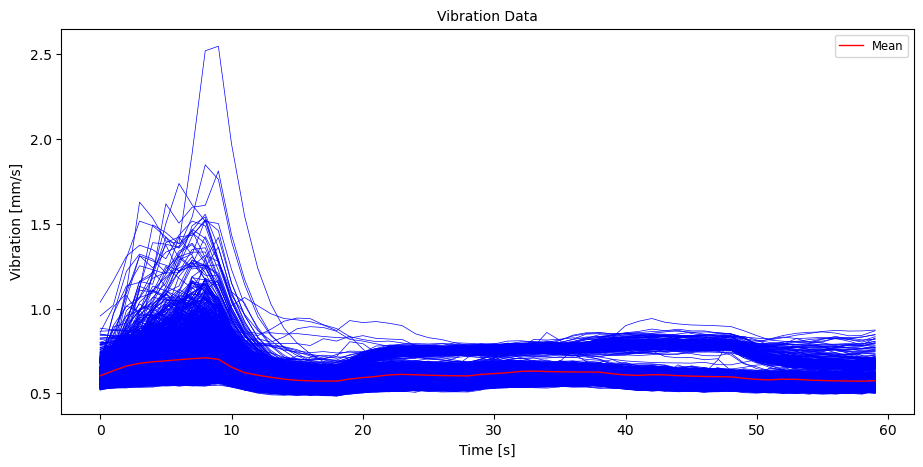

In [77]:
title = "Vibration Data"
x_label = "Time [s]"
y_label = "Vibration [mm/s]"

fig, ax = plt.subplots(figsize=(11, 5), dpi=100)

data_plot(ax, data['vs1'], title, x_label, y_label)


<h3>VS Sensor - Single Rows</h3>

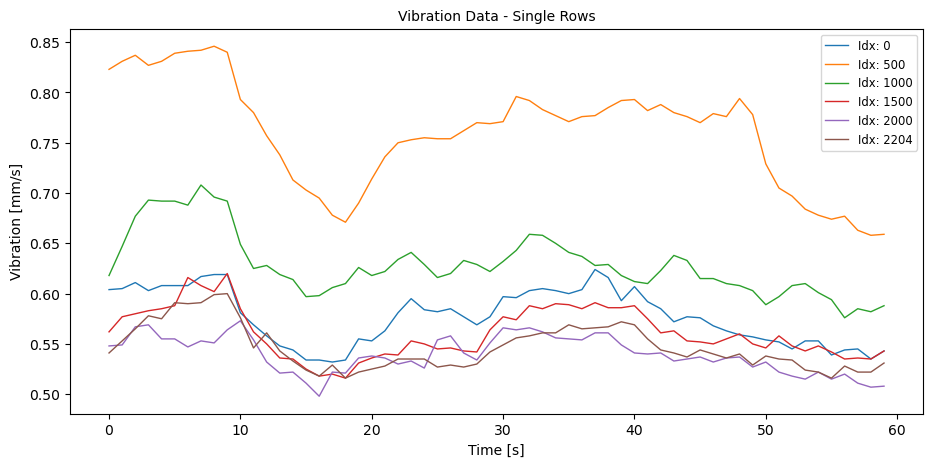

In [79]:
title = "Vibration Data - Single Rows"
x_label = "Time [s]"
y_label = "Vibration [mm/s]"

fig, ax = plt.subplots(figsize=(11, 5), dpi=100)
plot_single_rows(ax, data['vs1'], title, x_label, y_label, idx)

In [45]:
print(mean_per_vc(data['vs1']))

Valve_Condition
73     0.623013
80     0.619320
90     0.616718
100    0.607202
dtype: float64


<h2>SE Sensor (1 Hz)</h2>

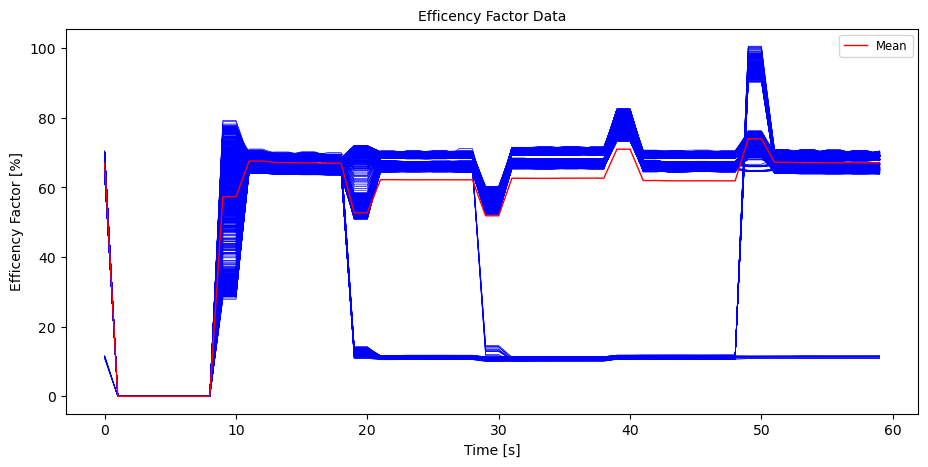

In [80]:
title = "Efficency Factor Data"
x_label = "Time [s]"
y_label = "Efficency Factor [%]"

fig, ax = plt.subplots(figsize=(11, 5), dpi=100)

data_plot(ax, data['se'], title, x_label, y_label)

<h3>SE Sensor - Single Rows</h3>

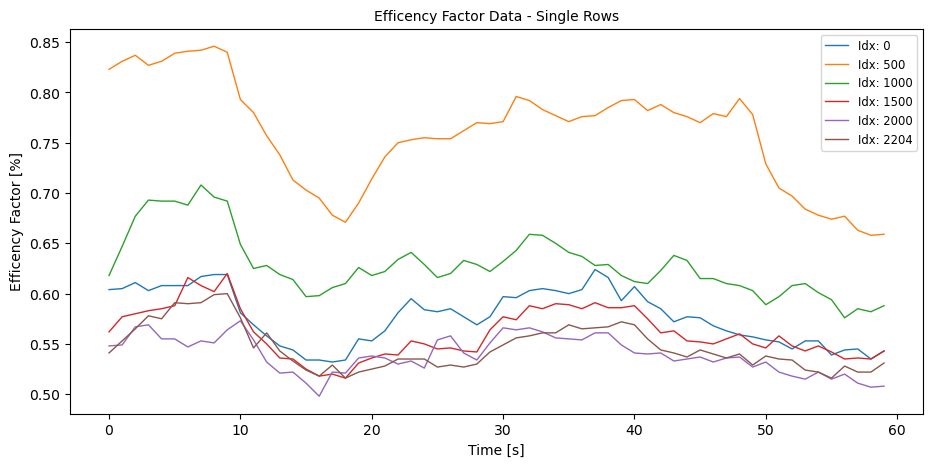

In [81]:
title = "Efficency Factor Data - Single Rows"
x_label = "Time [s]"
y_label = "Efficency Factor [%]"

fig, ax = plt.subplots(figsize=(11, 5), dpi=100)
plot_single_rows(ax, data['vs1'], title, x_label, y_label, idx)

In [48]:
print(mean_per_vc(data['se']))

Valve_Condition
73     52.441894
80     53.263315
90     53.464748
100    57.429897
dtype: float64


<h2>TS Sensors (1 Hz)</h2>

C:\Users\Daniel\AppData\Local\Temp\ipykernel_1320\3323979103.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best', fontsize='small')


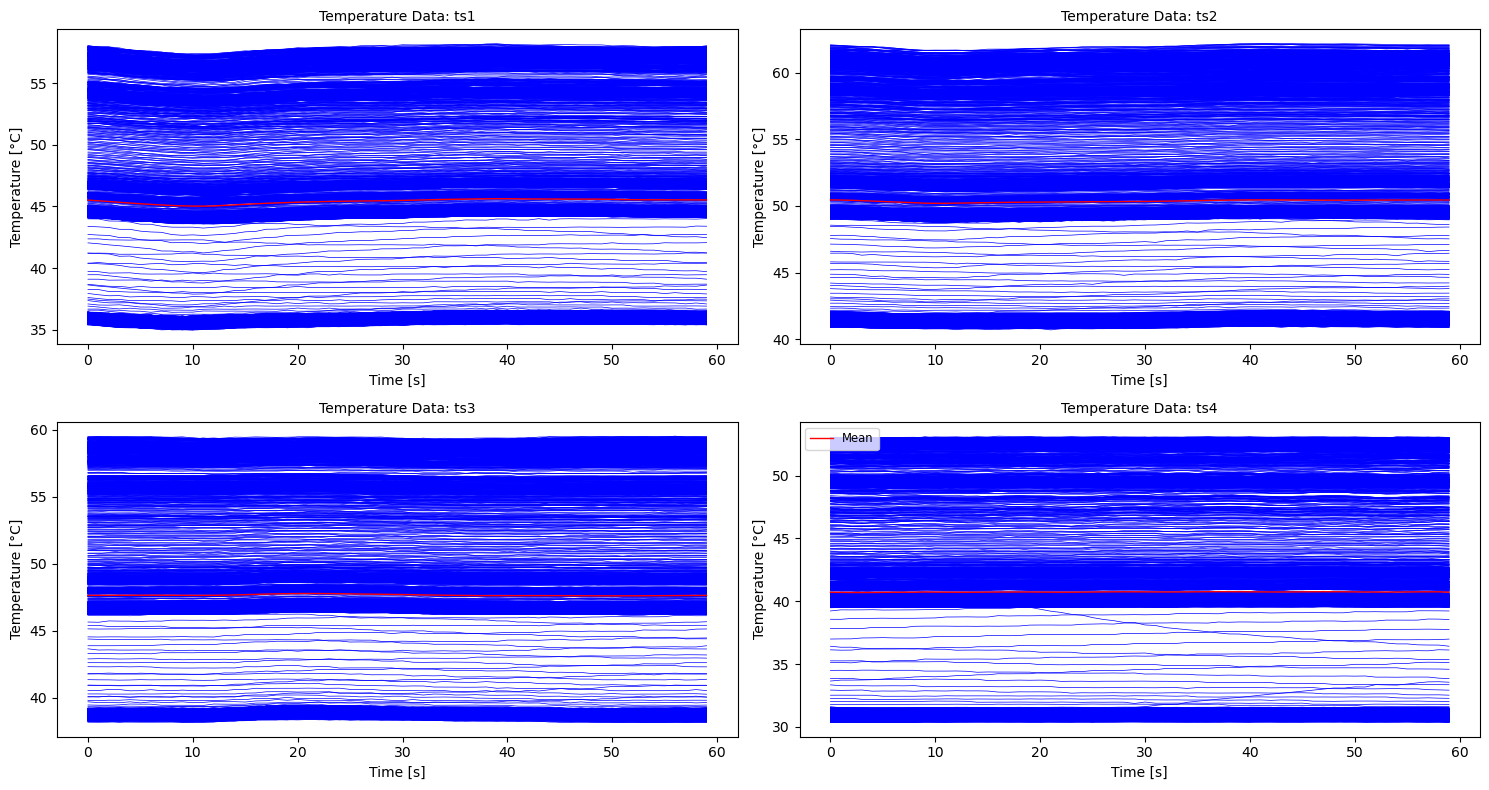

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8), dpi=100)
axes = axes.flatten()

x_label = "Time [s]"
y_label = "Temperature [°C]"

for idx, s in enumerate(temp_sensors):
    ax = axes[idx]
    title = f"Temperature Data - Sensor: {s}"
    data_plot(ax, data[s], title, x_label, y_label)
    
plt.tight_layout()

<h3>TS Sensors - Single Rows</h3>

C:\Users\Daniel\AppData\Local\Temp\ipykernel_1320\1838588952.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best', fontsize='small')


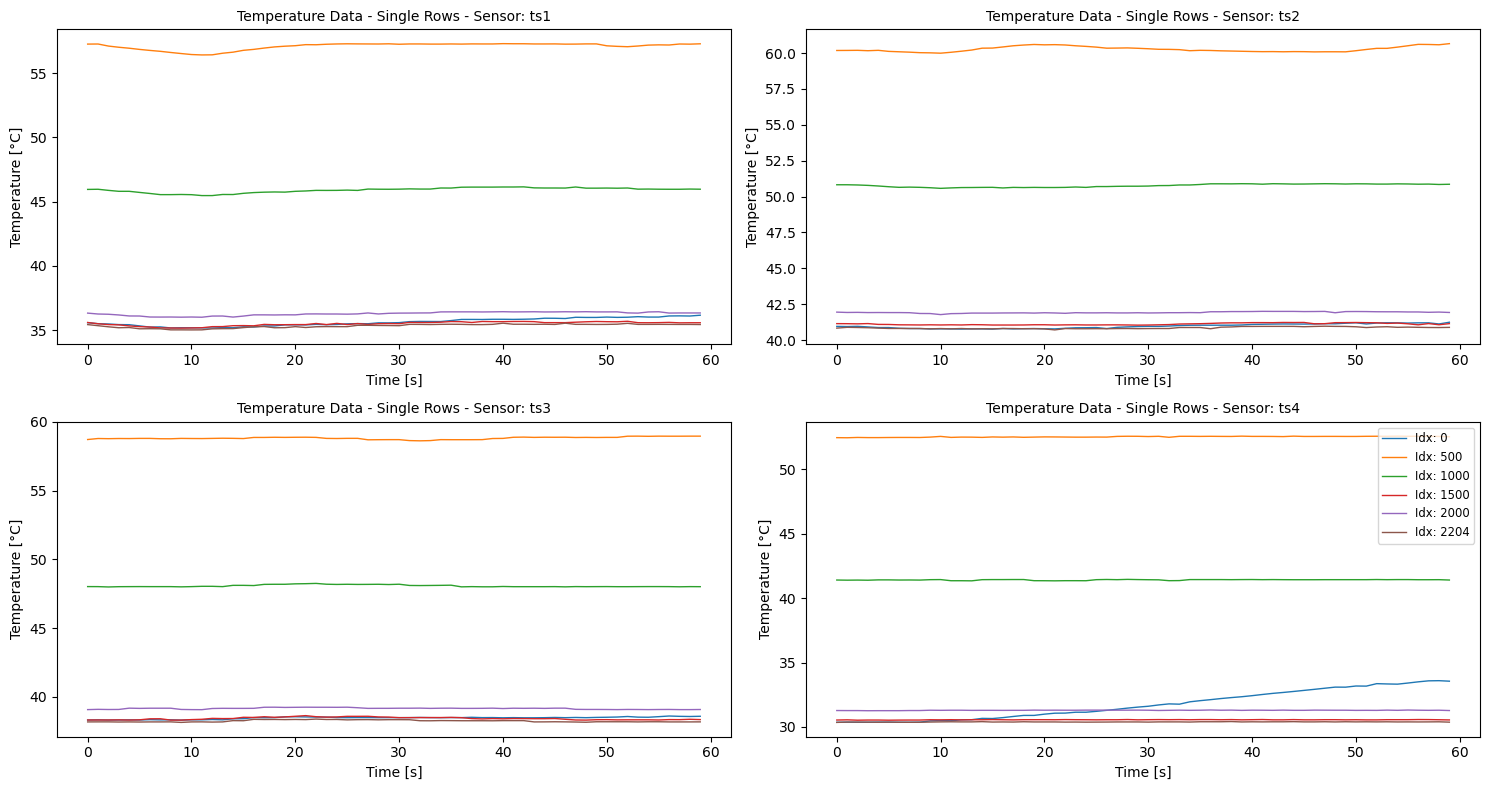

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8), dpi=100)
axes = axes.flatten()

x_label = "Time [s]"
y_label = "Temperature [°C]"

for i, s in enumerate(temp_sensors):
    ax = axes[i]
    title = f"Temperature Data - Single Rows - Sensor: {s}"
    plot_single_rows(ax, data[s], title, x_label, y_label, idx)

plt.tight_layout()

In [94]:
for s in temp_sensors:
  print(s + ':') 
  print(mean_per_vc(data[s]))

ts1:
Valve_Condition
73     45.629744
80     45.647847
90     45.671871
100    45.208323
dtype: float64
ts2:
Valve_Condition
73     50.500104
80     50.512613
90     50.525565
100    50.225068
dtype: float64
ts3:
Valve_Condition
73     47.857446
80     47.880050
90     47.901773
100    47.453192
dtype: float64
ts4:
Valve_Condition
73     40.933590
80     40.954339
90     40.961833
100    40.529958
dtype: float64


<h2>FS Sensors (10 Hz)</h2>

C:\Users\Daniel\AppData\Local\Temp\ipykernel_1320\3323979103.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best', fontsize='small')


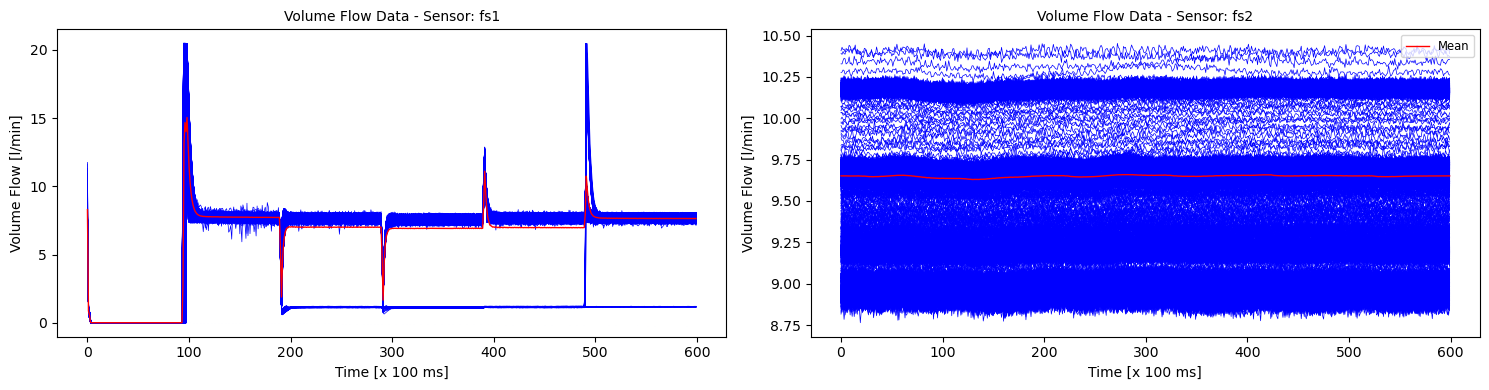

In [96]:


fig, axes = plt.subplots(1, 2, figsize=(15, 4), dpi=100)
axes = axes.flatten()

x_label = "Time [x 100 ms]"
y_label = "Volume Flow [l/min]"

for idx, s in enumerate(vf_sensors):
    ax = axes[idx]
    title = f"Volume Flow Data - Sensor: {s}"
    data_plot(ax, data[s], title, x_label, y_label)
    
plt.tight_layout()

<h3>FS Sensors - Single Rows </h3>

C:\Users\Daniel\AppData\Local\Temp\ipykernel_1320\1838588952.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best', fontsize='small')


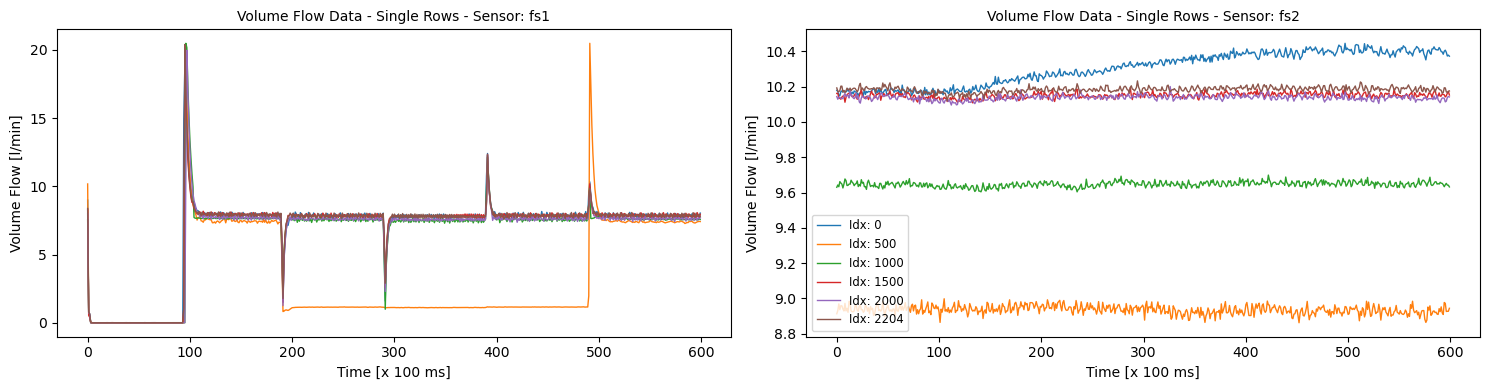

In [98]:
vf_sensors = ['fs1', 'fs2']

fig, axes = plt.subplots(1, 2, figsize=(15, 4), dpi=100)
axes = axes.flatten()

x_label = "Time [x 100 ms]"
y_label = "Volume Flow [l/min]"

for i, s in enumerate(vf_sensors):
    ax = axes[i]
    title = f"Volume Flow Data - Single Rows - Sensor: {s}"
    plot_single_rows(ax, data[s], title, x_label, y_label, idx)

plt.tight_layout()

In [99]:
for s in vf_sensors:
  print(s + ':') 
  print(mean_per_vc(data[s]))

fs1:
Valve_Condition
73     5.951552
80     5.993925
90     5.990347
100    6.409693
dtype: float64
fs2:
Valve_Condition
73     9.631467
80     9.628707
90     9.625955
100    9.669367
dtype: float64


<h2>EPS Sensor (100 Hz)</h2>

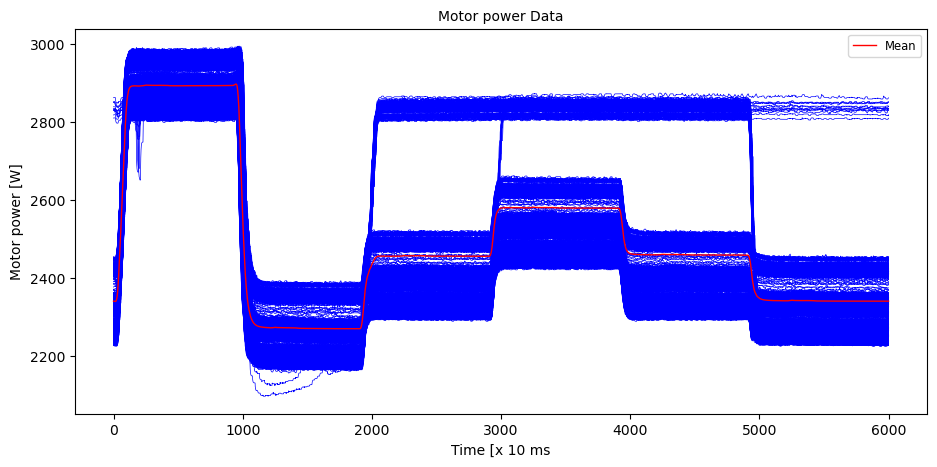

In [100]:
title = "Motor power Data"
x_label = "Time [x 10 ms"
y_label = "Motor power [W]"

fig, ax = plt.subplots(figsize=(11, 5), dpi=100)

data_plot(ax, data['eps1'], title, x_label, y_label)

<h3>EPS Sensor - Single Rows </h3>

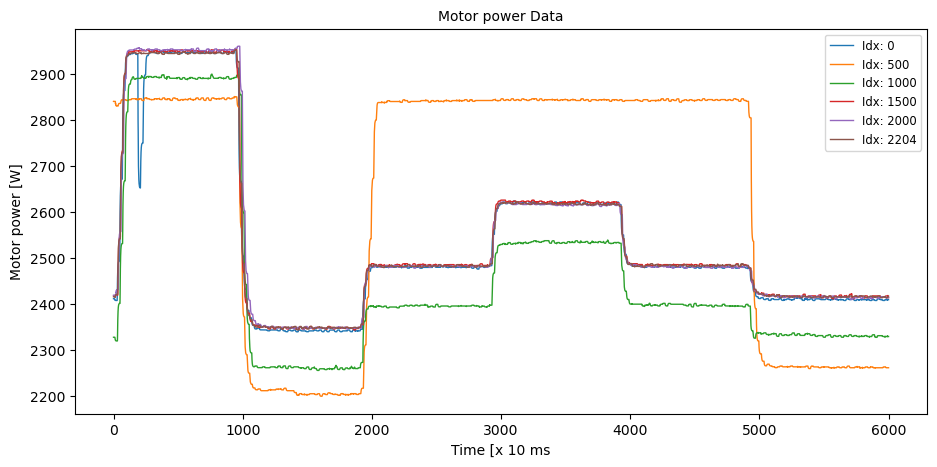

In [ ]:
title = "Motor power Data - Single Rows"
x_label = "Time [x 10 ms"
y_label = "Motor power [W]"

fig, ax = plt.subplots(figsize=(11, 5), dpi=100)
plot_single_rows(ax, data['eps1'], title, x_label, y_label, idx)

In [102]:
print(mean_per_vc(data['eps1']))

Valve_Condition
73     2511.798536
80     2508.887079
90     2509.089291
100    2481.670067
dtype: float64


<h2>PS Sensors (100 Hz)</h2>

C:\Users\Daniel\AppData\Local\Temp\ipykernel_16184\3323979103.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best', fontsize='small')


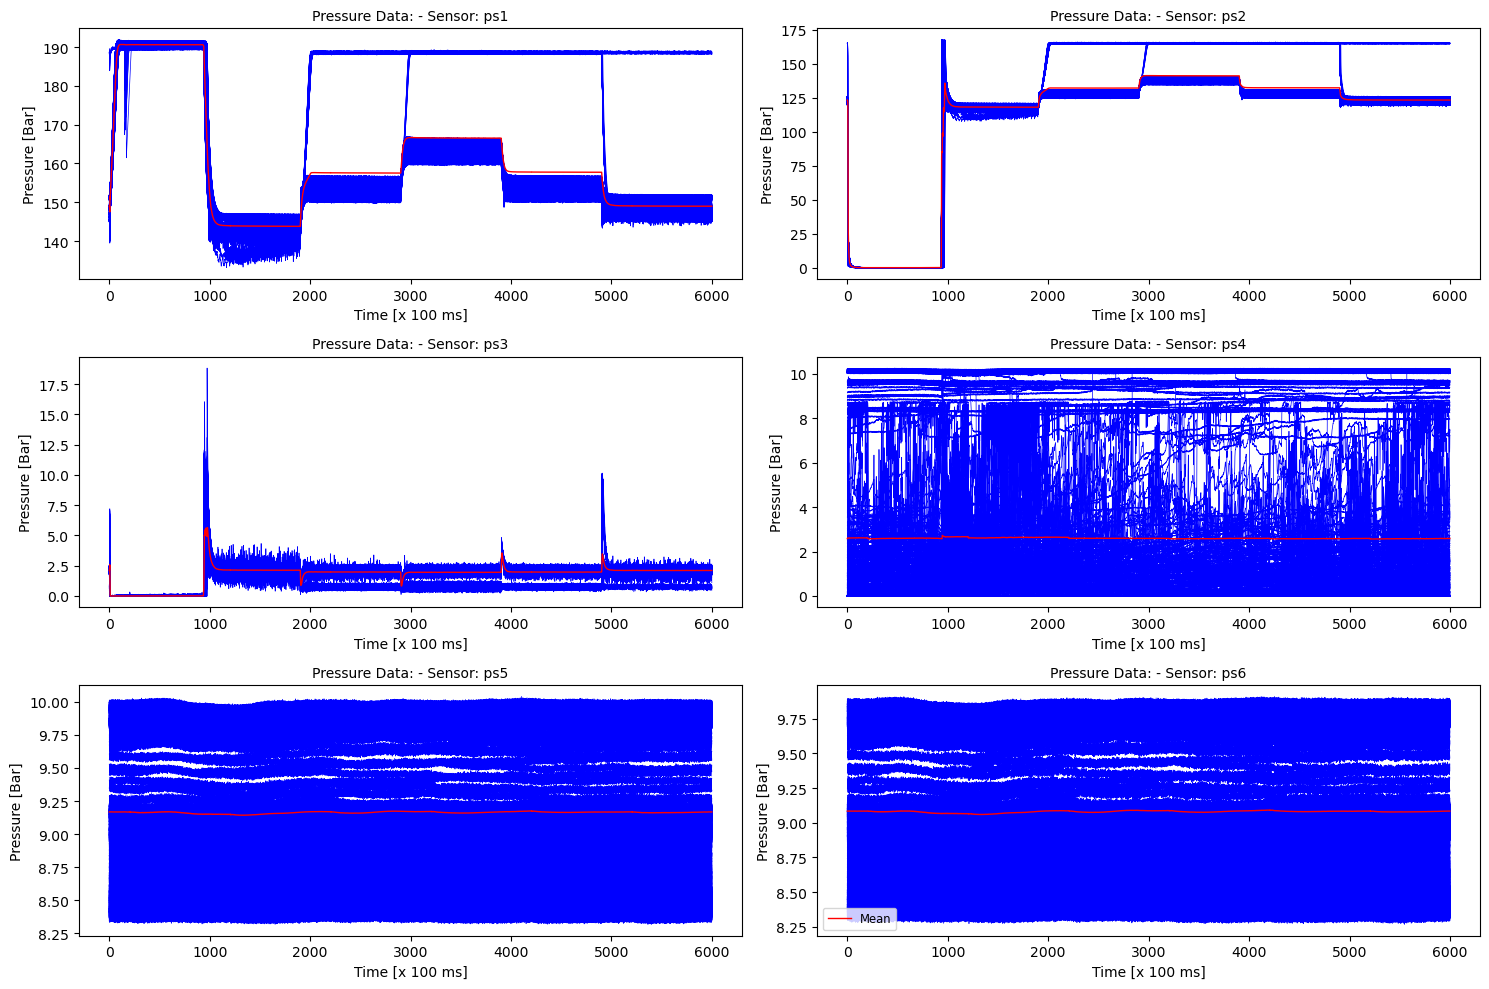

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10), dpi=100)
axes = axes.flatten()

x_label = "Time [x 100 ms]"
y_label = "Pressure [Bar]"

for idx, s in enumerate(ps_sensors):
    ax = axes[idx]
    title = f"Pressure Data: - Sensor: {s}"
    data_plot(ax, data[s], title, x_label, y_label)
    
plt.tight_layout()


<h3>PS Sensors - Single Rows </h3>

C:\Users\Daniel\AppData\Local\Temp\ipykernel_16184\859089541.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best', fontsize='small')


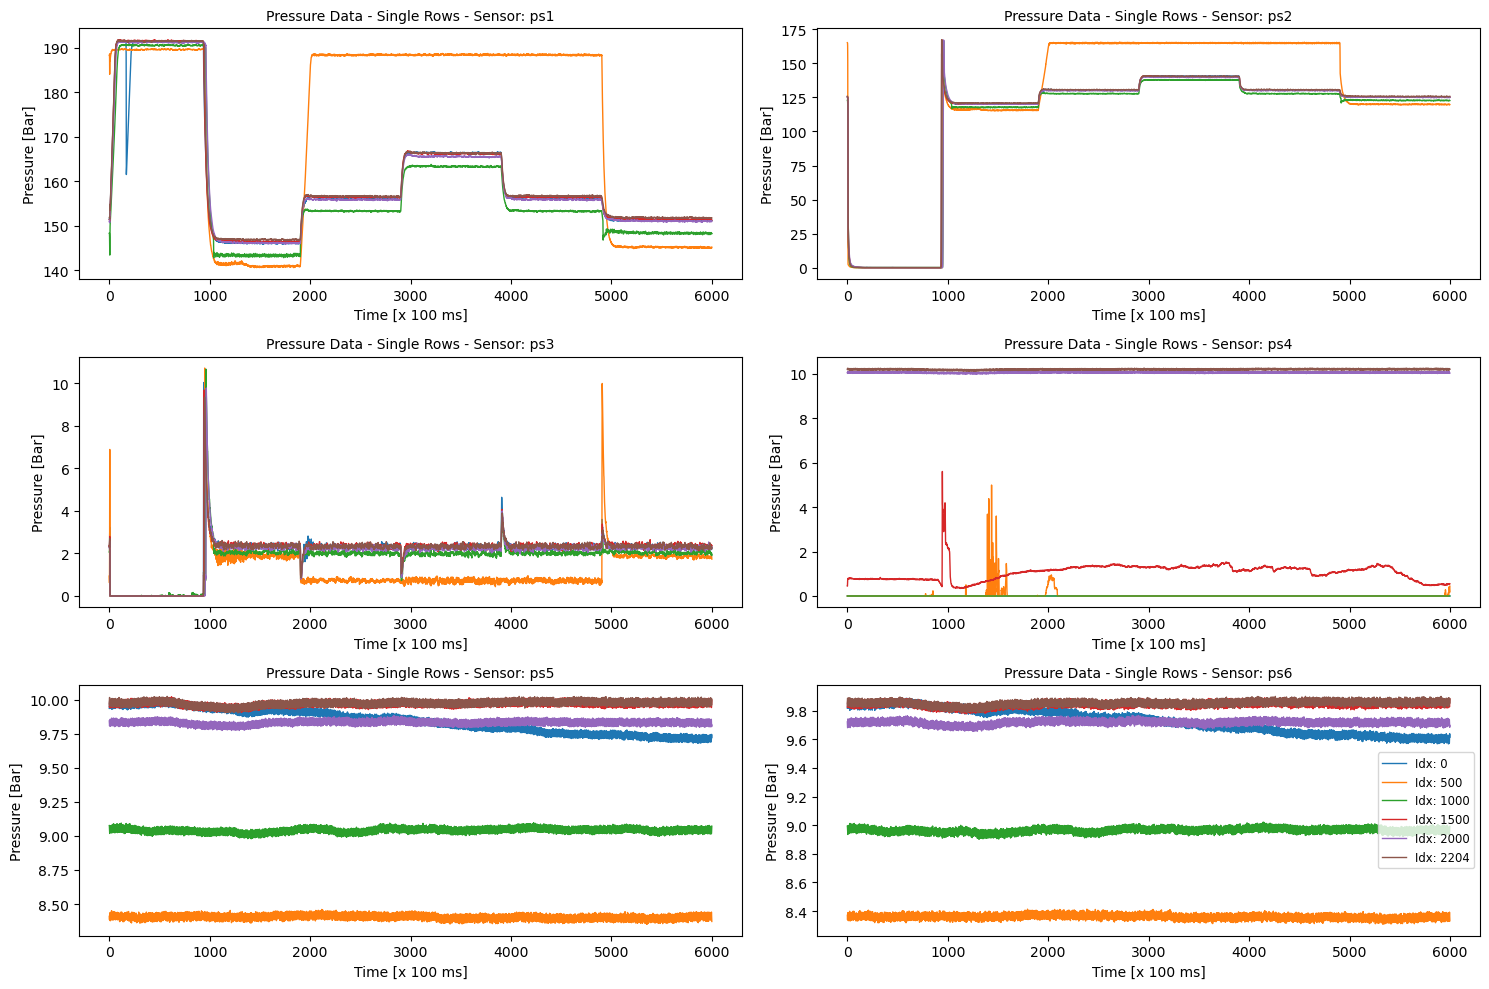

In [13]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10), dpi=100)
axes = axes.flatten()

x_label = "Time [x 100 ms]"
y_label = "Pressure [Bar]"

for i, s in enumerate(ps_sensors):
    ax = axes[i]
    title = f"Pressure Data - Single Rows - Sensor: {s}"
    plot_single_rows(ax, data[s], title, x_label, y_label, idx)

plt.tight_layout()

In [14]:
for s in ps_sensors:
  print(s + ':') 
  print(mean_per_vc(data[s]))

ps1:
Valve_Condition
73     161.408184
80     161.211482
90     161.239718
100    159.716214
dtype: float64
ps2:
Valve_Condition
73     109.810641
80     109.957396
90     110.273762
100    108.771240
dtype: float64
ps3:
Valve_Condition
73     1.702893
80     1.708117
90     1.710377
100    1.797482
dtype: float64
ps4:
Valve_Condition
73     3.422267
80     3.214646
90     3.248737
100    1.933113
dtype: float64
ps5:
Valve_Condition
73     9.150767
80     9.149400
90     9.148484
100    9.176539
dtype: float64
ps6:
Valve_Condition
73     9.067561
80     9.065915
90     9.065221
100    9.091968
dtype: float64


<h2> Valve Condition </h2>

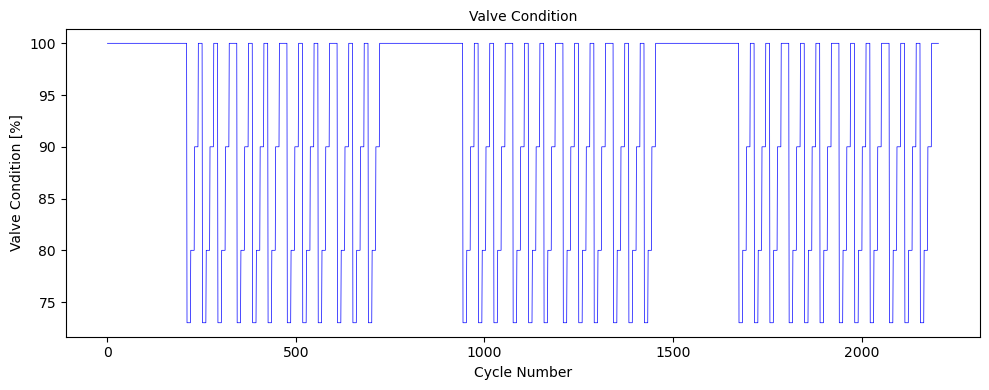

In [28]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=100)

ax.plot(df_target, color='blue', linewidth=0.5)

ax.set_title('Valve Condition', fontsize=10)
plt.xlabel("Cycle Number")
plt.ylabel("Valve Condition [%]")


plt.tight_layout()
plt.show()

<h2> Findings & Conclusions </h2>

<ul style="font-size: 20px; line-height: 3;">
    <li>It can be seen that the valve condition shows a certain cycle that repeats itself in the same pattern at a certain interval.</li>
    <li>The sensors SE, EPS1, PS1, PS2, PS3, FS1 show a similar behavior. Their curves can be divided into individual time-dependent phases.</li>
    <li>The above sensors show greater changes in their mean values per Valve Condition than the other sensors, which do not show a cyclical pattern.</li>
    <li>The sensors SE, EPS1, PS1, PS2, PS3, FS1 are therefore considered relevant for predicting the valve condition and are considered in the further procedure.</li>
    <li>None of these sensors show outliers or signal gaps that are relevant.</li>
    <li>The signals are not periodic and a Fast Fourier Transformation (FFT) cannot be used therefore. In addition, the signals are relatively small/short, which also reduces the usefulness of using an FFT.</li>
    <li>Since the signals are in column format and not in row format, windowing is difficult to perform, which is why this is also not considered further.</li>
</ul>
